In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
llaqo_df = pd.read_csv("checkpoint_51000.csv")[:66]
llaqo_df[-5:]

,audio_path,question,output,output_rating,gt,question_id,question_category,mae
259,/data/EECS-MachineListeningLab/datasets/LLaQo/...,How would you rate the correctness of the rhyt...,['4'],4.0,3,9,rhythm and tempo,1.0
260,/data/EECS-MachineListeningLab/datasets/LLaQo/...,How would you rate the consistency of the temp...,['4'],4.0,0,10,rhythm and tempo,4.0
261,/data/EECS-MachineListeningLab/datasets/LLaQo/...,How would you rate the connectivity of the lin...,['4'],4.0,3,11,articulation,1.0
262,/data/EECS-MachineListeningLab/datasets/LLaQo/...,"How would you rate the sense of tonality, on a...",['4'],4.0,2,12,tone production,2.0
263,/data/EECS-MachineListeningLab/datasets/LLaQo/...,How would you rate the naturalness of the dyna...,['4'],4.0,2,13,dynamics,2.0


In [4]:

def plot_by_qidx(df):
    # Assuming the DataFrame is named df
    # You might need to convert 'question_id' to a string if it's not already, for better plotting
    df['question_id'] = df['question_id'].astype(str)

    print(df['mae'].mean())

    # Setup the figure and axes
    fig, ax = plt.subplots(2, 1, figsize=(12, 12))  # 2 rows, 1 column

    # First plot: Mean Absolute Error by Question ID
    sns.barplot(ax=ax[0], x='question_id', y='mae', hue='question_id', data=df, estimator=np.average, palette='coolwarm')
    ax[0].set_title('Mean Absolute Error by Question ID')
    ax[0].set_xlabel('Question ID')
    ax[0].set_ylabel('Mean Absolute Error')
    ax[0].tick_params(axis='x', rotation=45)  # Rotate for better readability

    # Second plot: Mean Absolute Error by Question Category
    sns.barplot(ax=ax[1], x='question_category', y='mae',  hue='question_category', data=df, estimator=np.average, palette='viridis')
    ax[1].set_title('Mean Absolute Error by Question Category')
    ax[1].set_xlabel('Question Category')
    ax[1].set_ylabel('Mean Absolute Error')
    ax[1].tick_params(axis='x', rotation=45)  # Rotate for better readability

    plt.tight_layout()  # Adjust layout to not overlap
    plt.show()

1.803030303030303


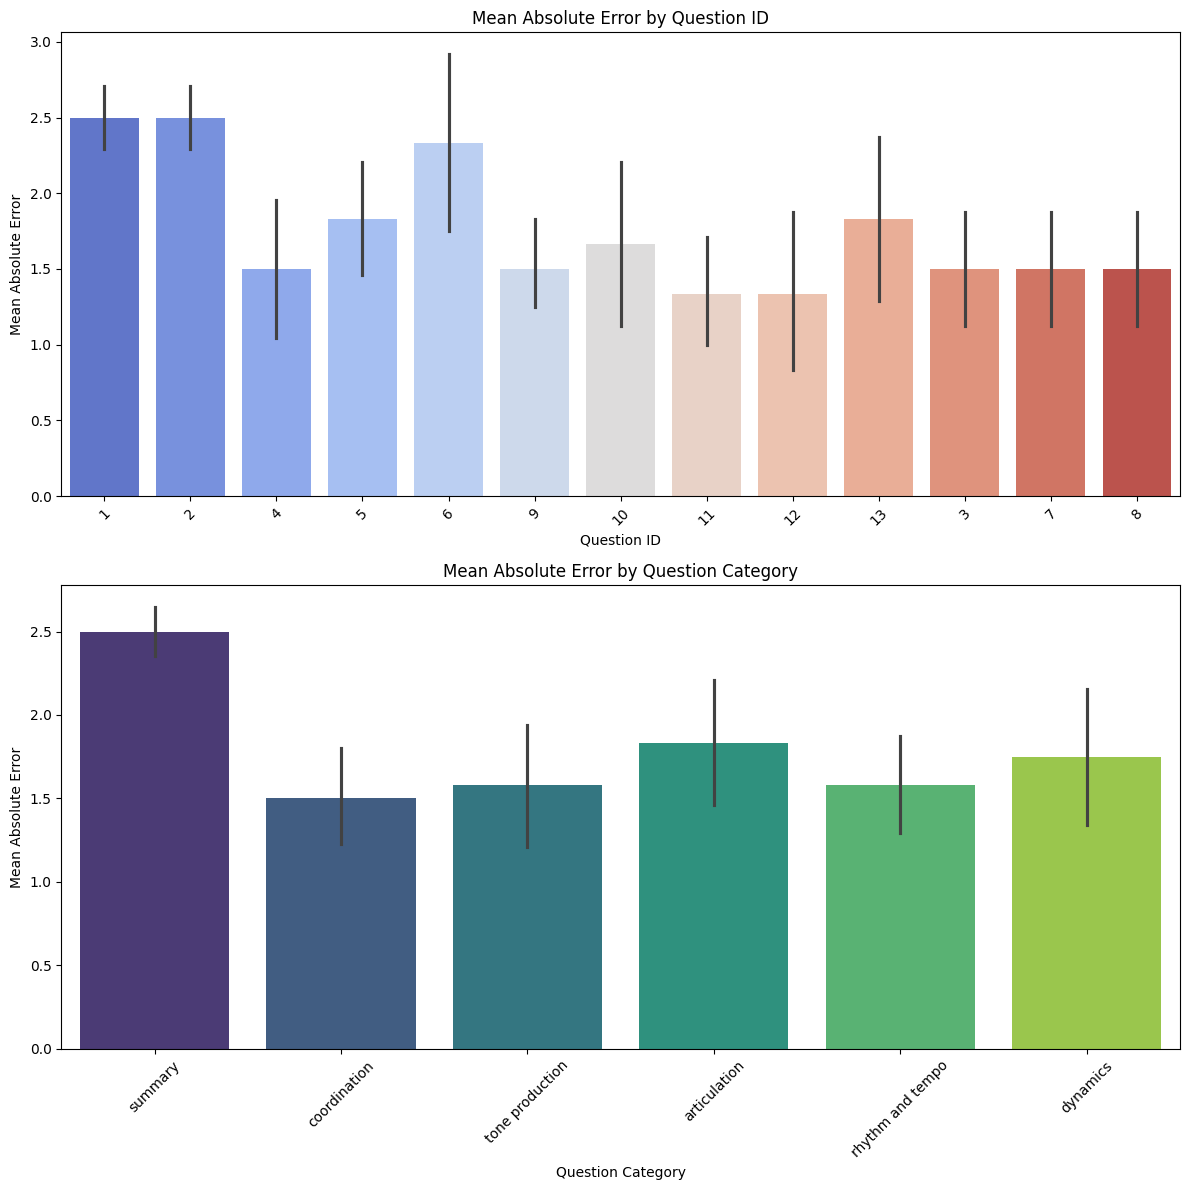

In [20]:
plot_by_qidx(llaqo_df)

## GT analysis

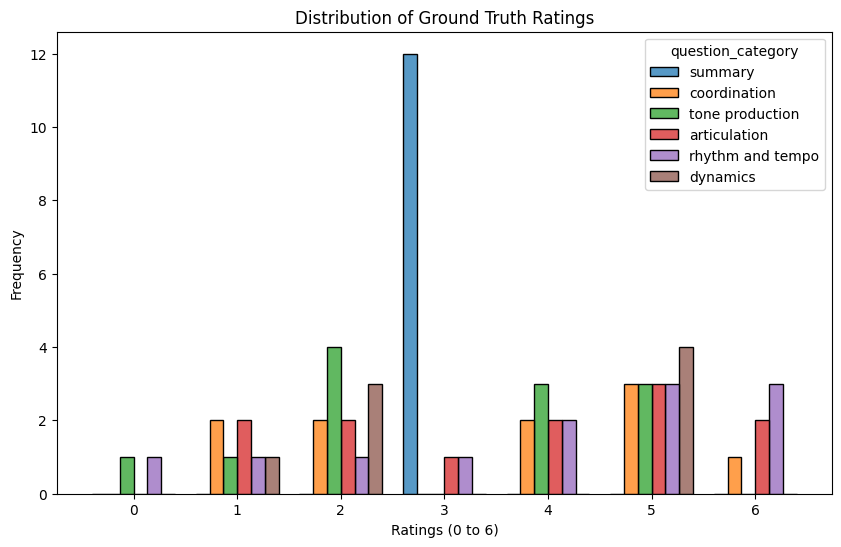

In [37]:

plt.figure(figsize=(10, 6))
sns.histplot(data=llaqo_df, x='gt', hue='question_category', bins=range(8), kde=False, discrete=True, multiple='dodge', shrink=.8)
plt.title('Distribution of Ground Truth Ratings')
plt.xlabel('Ratings (0 to 6)')
plt.ylabel('Frequency')
plt.xticks(range(7))  # Ensure we have ticks for each rating from 0 to 6
plt.show()